# WeatherPy

Observations:

The latitiude vs temperature plot shows the hottest temps or close to are at the equator (0 degrees) and decrease the further you move from it.

According to the plot many of the cities have at least 60% humidity in the air at the time of the data retrieval.

The wind speed is below 10 mph for most cities in the analysis.

In [1]:
# Dependencies
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openweathermapy as owm
import requests

from citipy import citipy
from config import api_key

In [2]:
#randomly select coordinates for cities and store
coord = []
for x in range(0,800):
    lat = np.random.uniform(-90,90)
    lng = np.random.uniform(-180,180)
    x = [lat, lng]
    coord.append(x)

# Generate Cities List

In [3]:
#Use citipy to get city and country name for the randomly selected coordinates
cities = []
country = []
for coord_pair in coord:
    lat, lng = coord_pair
    cities.append(citipy.nearest_city(lat, lng).city_name)
    country.append(citipy.nearest_city(lat, lng).country_code)
city_df = pd.DataFrame({'City':cities,'Country':country})


# Add columns for other values

city_df["Latitude"] = ""
city_df["Temperature"] = ""
city_df["Humidity"] = ""
city_df["Cloudiness"] = ""
city_df["Wind Speed"] = ""
city_df.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,camacari,br,,,,,
1,oranjemund,na,,,,,
2,talcahuano,cl,,,,,
3,yefira,gr,,,,,
4,nikolskoye,ru,,,,,


# Perform API Calls

In [4]:
#Counter for rows
row_count = 1

#Loop through cities to gather values for dataframe
for index, row in city_df.iterrows():
    # get city from df
    city = row["City"]
    
    url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    
    # Build partial query URL
    query_url = f"{url}appid={api_key}&units={units}&q="
    
    # Print log to ensure loop is working correctly
    print("Now retrieving city # " + str(row_count) + " " + str(city))
    row_count += 1
   
    # make request and print url
    response = requests.get(query_url + city)
    print(response.url)
    
    response = response.json()
   
    # Append retrieved values to the appropriate columns
    # Use try / except to skip any cities with errors
    try:
        lat_city = response["coord"]["lat"]
        temp_city = response["main"]["temp"]
        hum_city = response["main"]["humidity"]
        cloud_city = response["clouds"]["all"]
        wind_city = response["wind"]["speed"]
        
        city_df.set_value(index, "Latitude", lat_city)
        city_df.set_value(index, "Temperature", temp_city)
        city_df.set_value(index, "Humidity", hum_city)
        city_df.set_value(index, "Cloudiness", cloud_city)
        city_df.set_value(index, "Wind Speed", wind_city)
    
    except (KeyError, IndexError):
        print("Error with city data. Skipping")
        
        continue



Now retrieving city # 1 camacari
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=camacari
Now retrieving city # 2 oranjemund


C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. 

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=oranjemund
Now retrieving city # 3 talcahuano
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=talcahuano
Now retrieving city # 4 yefira
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=yefira
Error with city data. Skipping
Now retrieving city # 5 nikolskoye


C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:44: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:46: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\Tamu\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: set_value is deprecated and will be removed in a future release. 

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=nikolskoye
Now retrieving city # 6 ancud
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=ancud
Now retrieving city # 7 albany
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=albany
Now retrieving city # 8 mount gambier
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=mount%20gambier
Now retrieving city # 9 avera
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=avera
Now retrieving city # 10 butaritari
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=butaritari
Now retrieving city # 11 hvide sande
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=hvide%20sande
Now re

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=yulara
Now retrieving city # 61 vila franca do campo
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=vila%20franca%20do%20campo
Now retrieving city # 62 severo-kurilsk
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=severo-kurilsk
Now retrieving city # 63 grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=grand%20gaube
Now retrieving city # 64 alofi
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=alofi
Now retrieving city # 65 victoria
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=victoria
Now retrieving city # 66 mys shmidta
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbf

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=kushiro
Now retrieving city # 116 norman wells
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=norman%20wells
Now retrieving city # 117 mahebourg
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=mahebourg
Now retrieving city # 118 butaritari
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=butaritari
Now retrieving city # 119 sao filipe
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=sao%20filipe
Now retrieving city # 120 rosario oeste
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=rosario%20oeste
Now retrieving city # 121 vaini
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&un

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=airai
Now retrieving city # 171 vaini
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=vaini
Now retrieving city # 172 avarua
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=avarua
Now retrieving city # 173 punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=punta%20arenas
Now retrieving city # 174 gornopravdinsk
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=gornopravdinsk
Now retrieving city # 175 umzimvubu
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=umzimvubu
Error with city data. Skipping
Now retrieving city # 176 esperance
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fe

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=itarema
Now retrieving city # 225 khatanga
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=khatanga
Now retrieving city # 226 atuona
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=atuona
Now retrieving city # 227 port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=port%20lincoln
Now retrieving city # 228 hofn
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=hofn
Now retrieving city # 229 taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=taolanaro
Error with city data. Skipping
Now retrieving city # 230 tiksi
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=tortoli
Now retrieving city # 279 ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=ushuaia
Now retrieving city # 280 vaini
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=vaini
Now retrieving city # 281 port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=port%20elizabeth
Now retrieving city # 282 tura
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=tura
Now retrieving city # 283 geraldton
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=geraldton
Now retrieving city # 284 albany
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=albany
Now retriev

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=imbituba
Now retrieving city # 336 qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=qaanaaq
Now retrieving city # 337 nyimba
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=nyimba
Now retrieving city # 338 avarua
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=avarua
Now retrieving city # 339 san pedro
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=san%20pedro
Now retrieving city # 340 ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=ushuaia
Now retrieving city # 341 hilo
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=hilo
Now retrieving city # 

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=kapaa
Now retrieving city # 391 kodiak
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=kodiak
Now retrieving city # 392 puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=puerto%20ayora
Now retrieving city # 393 punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=punta%20arenas
Now retrieving city # 394 lagoa
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=lagoa
Now retrieving city # 395 northam
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=northam
Now retrieving city # 396 hithadhoo
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=hithadhoo

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=bluff
Now retrieving city # 446 jamestown
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=jamestown
Now retrieving city # 447 reyes
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=reyes
Now retrieving city # 448 boca do acre
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=boca%20do%20acre
Now retrieving city # 449 mataura
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=mataura
Now retrieving city # 450 port elizabeth
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=port%20elizabeth
Now retrieving city # 451 taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=westport
Now retrieving city # 501 tiksi
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=tiksi
Now retrieving city # 502 taolanaro
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=taolanaro
Error with city data. Skipping
Now retrieving city # 503 narsaq
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=narsaq
Now retrieving city # 504 cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=cabo%20san%20lucas
Now retrieving city # 505 new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=new%20norfolk
Now retrieving city # 506 gorno-chuyskiy
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=atuona
Now retrieving city # 555 kodiak
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=kodiak
Now retrieving city # 556 maldonado
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=maldonado
Now retrieving city # 557 pljevlja
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=pljevlja
Now retrieving city # 558 new norfolk
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=new%20norfolk
Now retrieving city # 559 belmonte
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=belmonte
Now retrieving city # 560 bac lieu
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=bac%20lieu


http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=hobart
Now retrieving city # 610 la ronge
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=la%20ronge
Now retrieving city # 611 illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=illoqqortoormiut
Error with city data. Skipping
Now retrieving city # 612 samusu
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=samusu
Error with city data. Skipping
Now retrieving city # 613 sao joao da barra
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=sao%20joao%20da%20barra
Now retrieving city # 614 busselton
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=busselton
Now retrieving city # 615 castro
http://api.openweath

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=gimli
Now retrieving city # 666 albany
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=albany
Now retrieving city # 667 barro
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=barro
Now retrieving city # 668 nizhneyansk
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=nizhneyansk
Error with city data. Skipping
Now retrieving city # 669 aklavik
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=aklavik
Now retrieving city # 670 fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=fort%20nelson
Now retrieving city # 671 makakilo city
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b3

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=puerto%20ayora
Now retrieving city # 722 kaitangata
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=kaitangata
Now retrieving city # 723 kapaa
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=kapaa
Now retrieving city # 724 riyadh
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=riyadh
Now retrieving city # 725 rikitea
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=rikitea
Now retrieving city # 726 fairlie
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=fairlie
Now retrieving city # 727 illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=illoqqortoo

http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=east%20london
Now retrieving city # 777 provideniya
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=provideniya
Now retrieving city # 778 nuuk
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=nuuk
Now retrieving city # 779 ust-kuyga
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=ust-kuyga
Now retrieving city # 780 hermanus
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=hermanus
Now retrieving city # 781 mrirt
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&units=imperial&q=mrirt
Error with city data. Skipping
Now retrieving city # 782 esperance
http://api.openweathermap.org/data/2.5/weather?appid=1529784736d3c384bab0fedcbff7b36f&u

In [5]:
city_df.count()

City           800
Country        800
Latitude       800
Temperature    800
Humidity       800
Cloudiness     800
Wind Speed     800
dtype: int64

In [7]:
city_df.head()

,City,Country,Latitude,Temperature,Humidity,Cloudiness,Wind Speed
0,camacari,br,-12.7,84.2,66,40,6.93
1,oranjemund,na,-28.55,61.39,100,0,5.95
2,talcahuano,cl,-36.72,69.8,64,0,16.11
3,yefira,gr,-36.72,69.8,64,0,16.11
4,nikolskoye,ru,59.7,21.2,85,0,4.47


In [8]:
# Save data to csv
city_df.to_csv("City Weather Output.csv")

# Latitude vs Temperature Plot

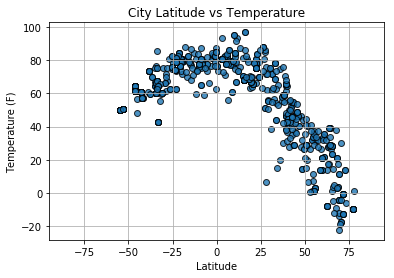

In [9]:
#create series array for scatter plot
xlat = np.array(city_df['Latitude'])
ytemp = np.array(city_df['Temperature'])

#Create scatter plot for each data type
plt.scatter(xlat,ytemp,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Temperature")

# Create a title, x label, y label and legend for chart
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.xlim([-95, 95])

plt.savefig("City Temp vs Lat.png")
plt.show()

# Latitude vs Humidity Plot

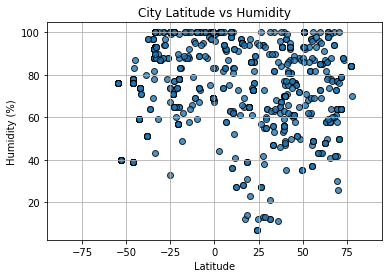

In [10]:
#create series array for scatter plot
yhum = np.array(city_df['Humidity'])

#Create scatter plot for each data type
plt.scatter(xlat,yhum,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Humidity")

# Create a title, x label, y label and legend for chart
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.xlim([-95, 95])

plt.savefig("City Humidity vs Lat.png")
plt.show()

# Latitude vs Cloudiness Plot

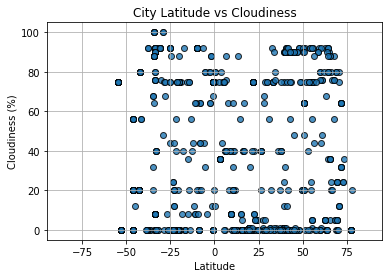

In [11]:
#create series array for scatter plot
ycloud = np.array(city_df['Cloudiness'])

#Create scatter plot for each data type
plt.scatter(xlat,ycloud,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Cloudiness")

# Create a title, x label, y label and legend for chart
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.xlim([-95, 95])

plt.savefig("City Cloudiness vs Lat.png")
plt.show()

# Latitude vs Wind Speed Plot

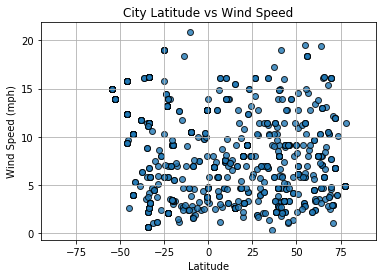

In [12]:
#create series array for scatter plot
yspeed = np.array(city_df['Wind Speed'])

#Create scatter plot for each data type
plt.scatter(xlat,yspeed,edgecolor="black", linewidths=1, marker="o",alpha=0.8, label="Wind Speed")

# Create a title, x label, y label and legend for chart
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.xlim([-95, 95])

plt.savefig("City Wind Speed vs Lat.png")
plt.show()